In [2]:
!pip install mglearn

     |████████████████████████████████| 540 kB 4.9 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=bd87a2b41d92f91428b61503c91265bd7ebff3494bbd7410dd58d903028f417c
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [3]:
#경고 를 뜨는 모든것을 무시한다.
from warnings import filterwarnings
filterwarnings('ignore')

[[ -1.72161036  -1.48033142]
 [ -3.6573384   -9.5482383 ]
 [  7.0778163    0.99508772]
 [ -1.36579859  -0.3148625 ]
 [ -2.66521206  -3.12591651]
 [  7.63027116   8.69797933]
 [ -5.27144331 -12.11880698]
 [  7.91767139   1.41547387]
 [ -1.41284184   0.11296348]
 [ -1.01519039  -1.03318203]
 [  8.2634157   10.34723435]
 [  6.96767867   8.9622523 ]
 [ -0.84779249  -2.12185612]
 [  7.48006237   2.49392925]
 [  7.71454967   1.8420701 ]
 [ -7.74064658  -8.61800744]
 [ -5.41087235  -8.7194128 ]
 [ -2.27579204  -2.89699926]
 [ -1.25668449  -2.33416219]
 [  7.61227907   9.4463627 ]
 [  8.81545663   8.76386046]
 [  7.1895354    0.43090048]
 [  7.40292703   9.16217702]
 [  5.17209648  11.78064756]
 [ -2.10476115  -1.57846672]
 [  6.5342397    9.45532341]
 [  7.59635095   8.0197955 ]
 [ -0.6560501    0.68997013]
 [ -4.86090778 -10.77386053]
 [  8.90864428   0.97764968]
 [  8.09770696  -0.58369965]
 [ -0.79757091  -2.88641638]
 [  9.92897802   1.76719511]
 [ -1.36106796  -2.02701586]
 [  5.5987887 

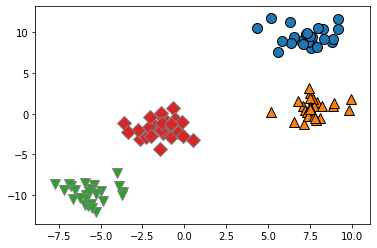

In [4]:
#import
import mglearn
import matplotlib.pyplot as plt
import numpy as np 
from mglearn.datasets import make_blobs

#이진분류 세트 
x,y = make_blobs(centers =4,random_state= 8) #4개의 label 영역 

print(x)
print(y.shape) #center = 4 (0~3 까지의 데이터를 랜덤하게 배치 한 레이블 데이터)

mglearn.discrete_scatter(x[:,0],x[:,1], y) #데이터를 보면은 선형으로 분류하기 힘든 모델이다.
plt.show()

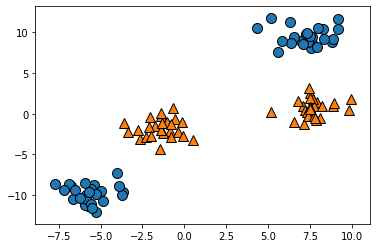

In [5]:
#y를 0 과 1 로 변경 y%2 == 0  -> 0 else  -> 1

y = y%2

mglearn.discrete_scatter(x[:,0],x[:,1],y)
 #이렇게 해도 한개의 직선으로는 분류 하기가 쉽지 않다

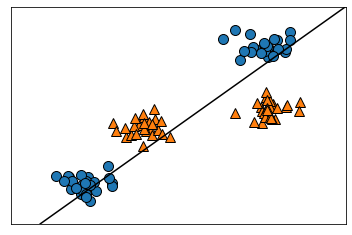

In [6]:
#LInearSVC 적용 
from sklearn.svm import LinearSVC

model = LinearSVC().fit(x,y)

#xx = np.linspace(-8,10,50)

mglearn.plots.plot_2d_separator(model,x)
mglearn.discrete_scatter(x[:,0],x[:,1],y)
plt.show()

#완벽한 분류 직선이라고 말할수 없다.

##SVM 

[[-1.72161036 -1.48033142  2.19138111]]


Text(0.5, 0, 'feature 1 **2')

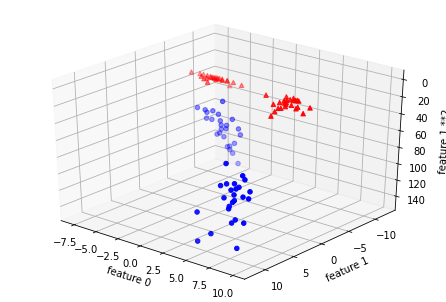

In [7]:
from mpl_toolkits.mplot3d import Axes3D,axes3d #3D 시각화 라이브러리 
import numpy as np 

#print(x[0])
#두번째 특성을 제곱하여 hstack 으로 다시 만듬
x_new = np.hstack([x,x[:,1:] ** 2]) #새로운 데이터를 만듬 
#print(x_new[0])
'''
[-1.72161036 -1.48033142]
[-1.72161036 -1.48033142  2.19138111] 특성을 제곱하여 하나 더 만듬
'''

fig = plt.figure()
ax = Axes3D(fig,azim = -130,elev = -150)
'''
시각화 라이브러리 Axes3D
Axes3D(figuresize 크기, azim)

azim = 공간에서 좌우 회전하여 보는 각도 
elev = 위에서 보는 각도 
'''
mask = (y == 0)
#print(mask)
ax.scatter(x_new[mask,0],x_new[mask,1],x_new[mask,2],c = 'b')
print(x_new[True,0])
mask = (y== 1)
ax.scatter(x_new[mask,0],x_new[mask,1],x_new[mask,2],c = 'r',marker = '^')
#print(x_new[mask,0])
#x 비트를 뒤집은 모양 
#ax.scatter(x_new[~mask,0],x_new[mask,1],x_new[~mask,2],c = 'y',marker = '^')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
ax.set_zlabel('feature 1 **2')


[ 0.1154139  -0.19524744 -0.05573436] [1.15482723]
-7.740646580804566 -12.118806977213685
9.928978021698963 11.78064755976018
(50,) (50,)
2


Text(0.5, 0, 'feature 1 **2')

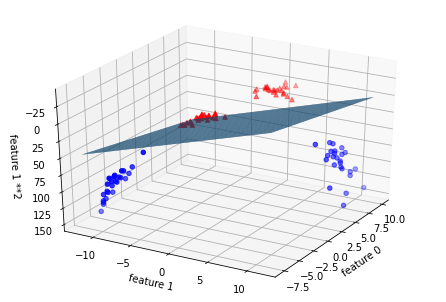

In [8]:
#linear svc  적용 하여 모델 분류 선 만들기 
from sklearn.svm import SVC 

#model 학습 
model = LinearSVC().fit(x_new,y)

w,b = model.coef_.ravel(),model.intercept_
print(w,b) #특성 3 개의 가중치 + bias 한개 

fig = plt.figure()
ax = Axes3D(fig,azim = -30, elev=-150)

print(x_new[:,0].min() ,x_new[:,1].min())
print(x_new[:,0].max() ,x_new[:,1].max())
#3차원 직선의 방정식 만들기 
xx = np.linspace(x_new[:,0].min(),x_new[:,0].max(),50)
yy = np.linspace(x_new[:,1].min(),x_new[:,1].max(),50)

print(xx.shape ,yy.shape) #두개 다 1차원이라 행렬곱 할려면 2차원 데이터 로 바꿔줘야 함 

X2,Y2 = np.meshgrid(xx,yy) #1차원을 2차원으로 만들어주는 함수 

zz = -(w[0] * X2+w[1]*Y2 + b)/w[2] #백터의 직선의 방정식 
print(zz.ndim)


ax.plot_surface(X2,Y2,zz) #평면 그리기 
# y == 0인 포인트를 먼저 그리고 그 다음 y == 1인 포인트를 그림
mask = (y == 0)
ax.scatter(x_new[mask,0],x_new[mask,1],x_new[mask,2],c='b')

mask = (y == 1)
ax.scatter(x_new[mask,0],x_new[mask,1],x_new[mask,2],c='r',marker = '^')
# ~ 비트 NOT : x의 비트를 뒤집음
#ax.scatter(x_new[~mask,0],x_new[mask,1],x_new[~mask,2],c='r',marker = '^')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
ax.set_zlabel('feature 1 **2')

##SVM 

[False False False False False False  True  True  True  True  True]


'\n규정된 svm 안에 들어가는 support vector 들은 크기가 큰것으로 나온다\n'

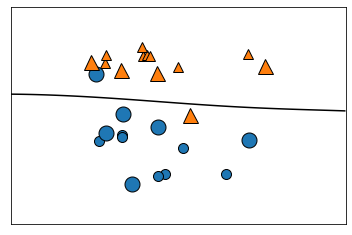

In [9]:
from sklearn.svm import SVC 

x,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(x[:,0],x[:,1],y)

model = SVC(C = 1,gamma = 0.1).fit(x,y) #내부적으로 3차원 곡선을 바로 만들수 있음 
mglearn.plots.plot_2d_separator(model,x)

sv = model.support_vectors_ #model 의 결정 경계를 만들어주는 sv 

model.dual_coef_#support vector 의 가중치 값이 들어 있음 

sv_lables = model.dual_coef_.ravel() >0 
print(sv_lables) #sv 의 들어가는 값들을  true 로 반환 
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_lables , s = 15)
'''
규정된 svm 안에 들어가는 support vector 들은 크기가 큰것으로 나온다
'''

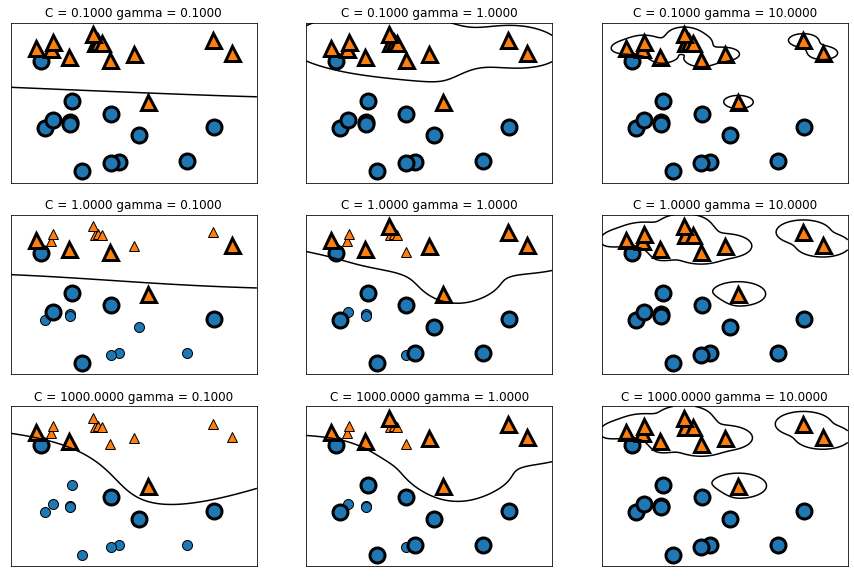

In [10]:
#C gamma 를 바꾸면서 분류 선 보기 

fig,axes  = plt.subplots(3,3,figsize = (15,10))

for C ,ax in zip([-1,0,3],axes): #지수승 으로 들어가는거 실화냐..
  for gamma , a in zip(range(-1,2),ax):
    mglearn.plots.plot_svm(C,gamma,a)

##유방암 데이터 SVM(SVC)적용



In [13]:
#import
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

#data_load
cancer = load_breast_cancer()

x = cancer.data
y = cancer.target


#train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)

#model 
model = SVC(C =1,gamma = 0.1).fit(train_x,train_y)

#model 평가 
print(model.score(train_x,train_y),model.score(test_x,test_y))

'''
C , gamma 의 영향을 안줄 떄 test 가 더 잘나오는 과소 적합 현상이 발생 한다.
gamma = 0.1 이면 test 데이터 가 확 떨어진 과대 적합 현상이 발생한다 
-> 이유가 뭘까?
'''



1.0 0.6293706293706294


'\nC , gamma 의 영향을 안줄 떄 test 가 더 잘나오는 과소 적합 현상이 발생 한다.\n\n'

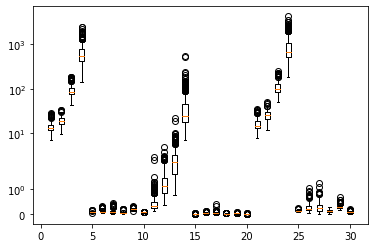

'\n보면은 이상치 가 많은 것으로 확인된다 -> 학습이 잘안됌 \n정규화나 값을 바꿔주는 표현식이 필요하다.\n'

In [26]:
#유방암 데이터 사분위수 시각화 
plt.boxplot(train_x,manage_ticks= False)
plt.yscale('symlog') #y축 데이터 스케일 표현을 바꾸고 싶을떄 yscale , 'symlog'  = 상용로그 표현식 10 의 지수승 
plt.show()
'''
보면은 이상치 가 많은 것으로 확인된다 -> 학습이 잘안됌 
정규화나 값을 바꿔주는 표현식이 필요하다.
'''

In [19]:
#SVM 을 전처리 하는 과정 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #객체 선언 
scaler.fit_transform(train_x) #train_x 를 기준으로 minmaxscaler 실행  = minmaxnormalization 이랑 같은 개념이다.
train_x_scaled = scaler.transform(train_x) 
test_x_scaled = scaler.transform(test_x)

In [24]:
#gamma 파라미터를 다시 조정 하고 학습 
model = SVC(C = 10,gamma = 0.2).fit(train_x_scaled,train_y)
print(model.score(train_x_scaled,train_y),model.score(test_x_scaled,test_y)) #두개의 학습이 잘된것으로 확인 할수 있다.

0.9859154929577465 0.972027972027972
